In [66]:
import pandas as pd


In [67]:
df = pd.read_csv('elden_ring_steam_reviews.csv')

In [68]:
df.head()


,id,language,review,created,voted_up,votes_up,comment_count,steam_purchase,recieved_for_free,written_during_early_access,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_playtime_at_review,author_last_played
0,134238864,english,being killed over and over again is fun,2023-03-07 14:19:11,True,0,0,False,False,False,47,2,355,355,346,2023-03-07 14:29:21
1,134238208,english,I write this review as I have 100% completed E...,2023-03-07 14:03:24,True,0,0,True,False,False,110,2,24238,5823,24238,2023-03-07 02:08:22
2,134238033,english,Fun,2023-03-07 13:59:13,True,0,0,True,False,False,11,1,912,912,881,2023-03-07 14:30:07
3,134237508,english,pretty cool.,2023-03-07 13:46:37,True,0,0,True,False,False,94,8,8497,2914,8497,2023-03-07 13:44:52
4,134236511,english,AMAZINGGGGGGGGGGGGG,2023-03-07 13:20:04,True,0,0,True,False,False,4,1,985,163,923,2023-03-07 14:26:41


In [69]:
df = df[['id','review','voted_up']]

In [70]:
df['voted_up'] = df['voted_up'].astype(int)
df.head()

,id,review,voted_up
0,134238864,being killed over and over again is fun,1
1,134238208,I write this review as I have 100% completed E...,1
2,134238033,Fun,1
3,134237508,pretty cool.,1
4,134236511,AMAZINGGGGGGGGGGGGG,1


In [71]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
review, review_val = train_test_split(df, test_size=0.2, random_state=42)

# Display the sizes of the resulting datasets
print("Size of review dataset:", review.shape)
print("Size of review_val dataset:", review_val.shape)


Size of review dataset: (7835, 3)
Size of review_val dataset: (1959, 3)


In [72]:
review.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7835 entries, 3776 to 7270
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7835 non-null   int64 
 1   review    7811 non-null   object
 2   voted_up  7835 non-null   int32 
dtypes: int32(1), int64(1), object(1)
memory usage: 214.2+ KB


In [73]:
review.review = review.review.astype('str')

## 3.1. Distribution of Reviews in Each Sentiment


In [74]:
temp = review.groupby('voted_up').count()['review'].reset_index().sort_values(by='review')
temp

,voted_up,review
0,0,473
1,1,7362


<Axes: xlabel='voted_up', ylabel='count'>

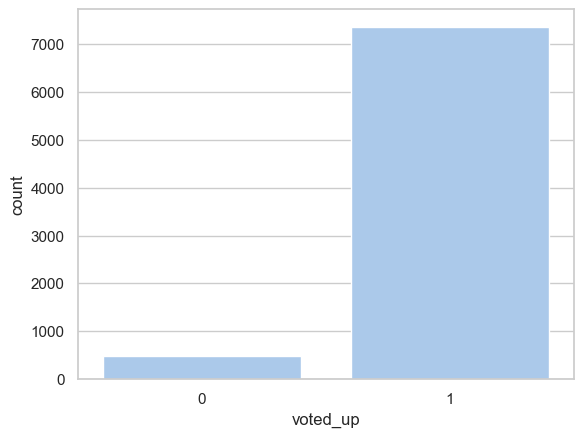

In [75]:
import seaborn as sns
sns.set_theme(style='whitegrid')
# sns.set(rc = {'figure.figsize':(13,8)})

sns.set_palette("pastel")
sns.countplot(x='voted_up',data=review)

more positive sentence than negetive

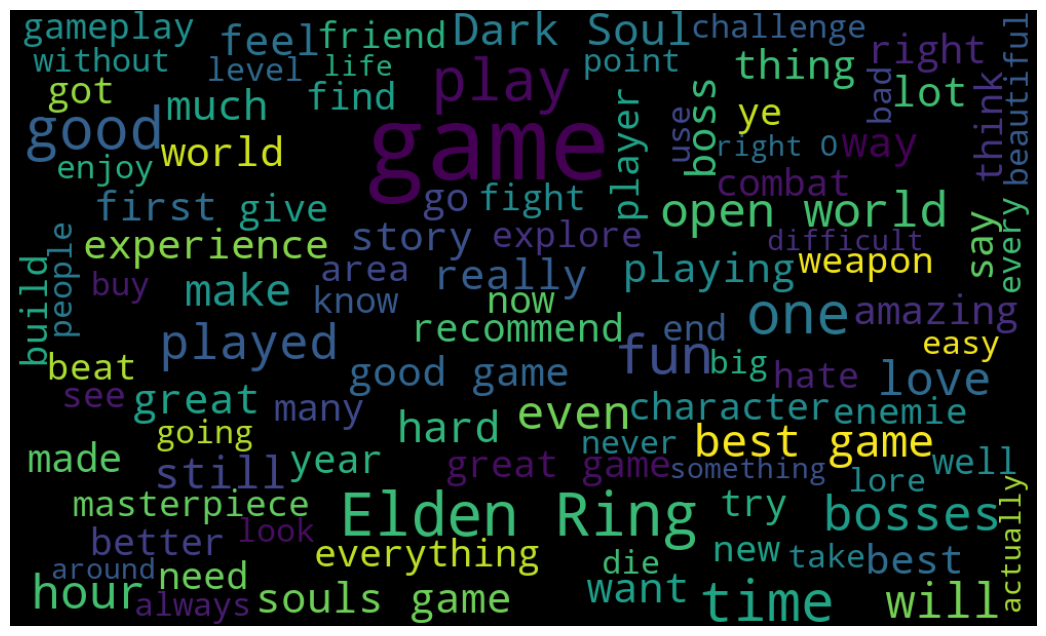

In [76]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
txt = ' '.join(rev for rev in review.review)
plt.figure(figsize=(15,8))

wordcloud = WordCloud(
            background_color = 'black',
            max_font_size = 100,
            max_words = 100,
            width = 1000,
            height = 600
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [77]:
positive = review[review['voted_up']==1]
negative = review[review['voted_up']==0]

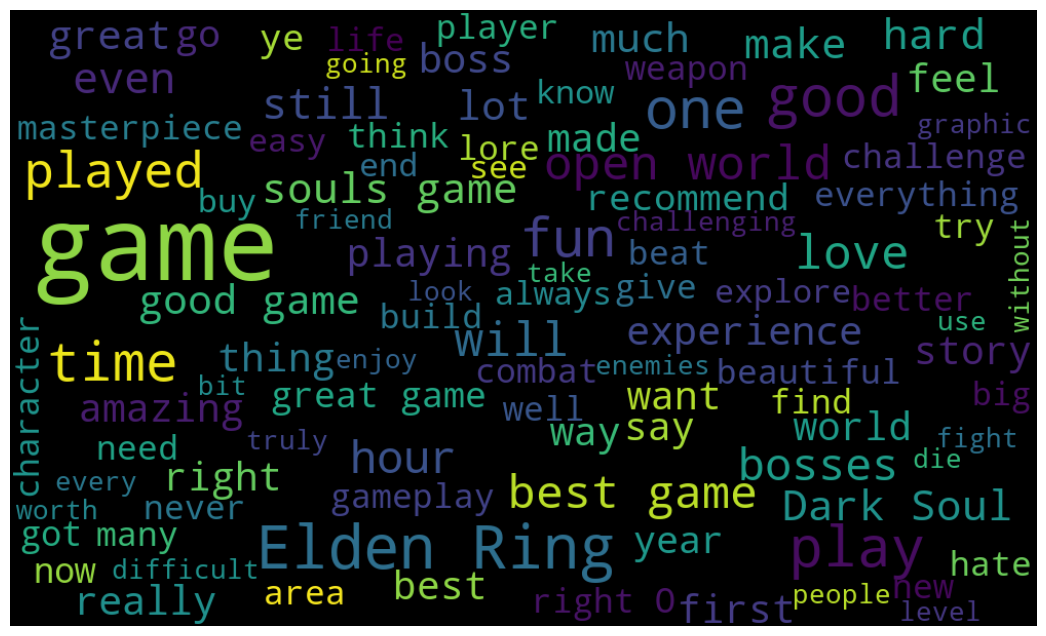

In [78]:
txt = ' '.join(rev for rev in positive.review)
plt.figure(figsize=(15,8))

wordcloud = WordCloud(
            background_color = 'black',
            max_font_size = 100,
            max_words = 100,
            width = 1000,
            height = 600
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

we can see that for postive sentiment review common word are  best , game, old, nice, great, better, classic etc

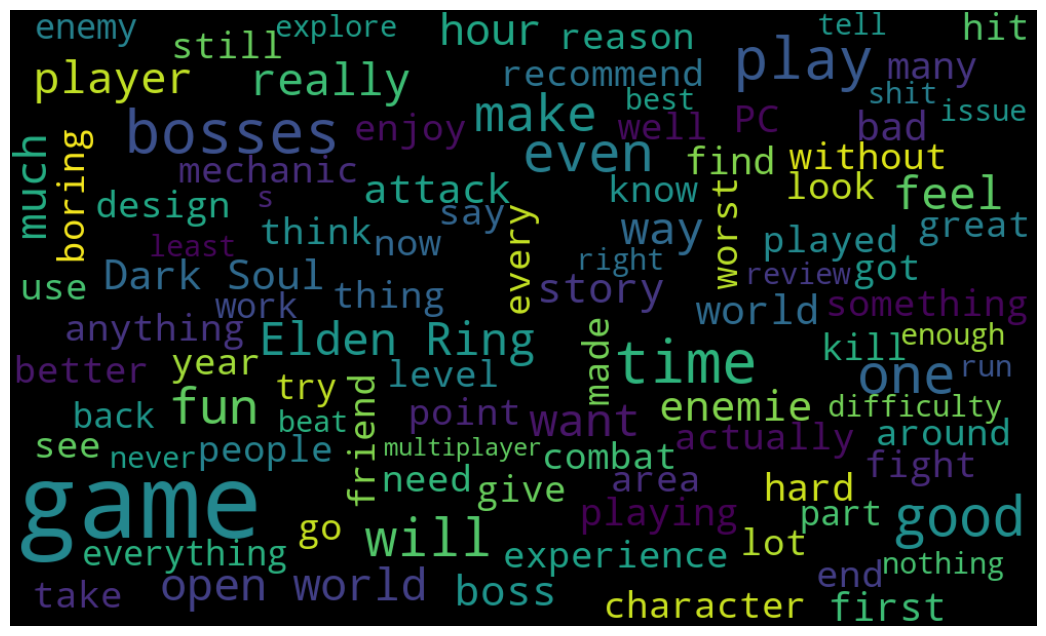

In [79]:
txt = ' '.join(rev for rev in negative.review)
plt.figure(figsize=(15,8))

wordcloud = WordCloud(
            background_color = 'black',
            max_font_size = 100,
            max_words = 100,
            width = 1000,
            height = 600
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

for negetice sentiment review we can see that most common words are kill,, wate,graphic, server , game etc

In [80]:

review_vis = review.copy()
review_vis['Num_word_review'] = review_vis['review'].apply(lambda x:len(str(x).split()))

<Axes: xlabel='Num_word_review', ylabel='Count'>

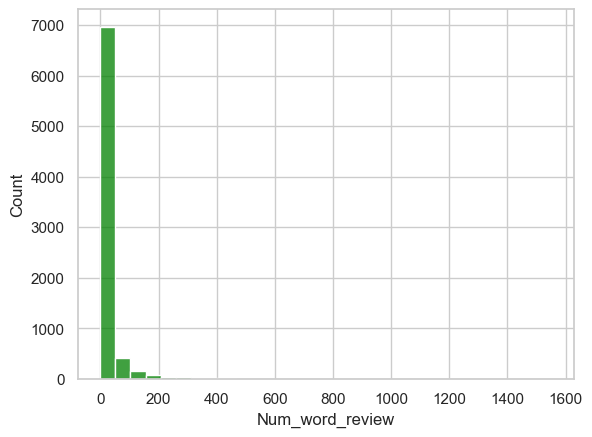

In [81]:
sns.histplot(data=review_vis, x="Num_word_review",bins=30,color='green')

In [82]:
from collections import Counter

review_vis['temp_list'] = review_vis['review'].apply(lambda x:str(x).split())
top = Counter([item for sublist in review_vis['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']


In [83]:
temp

,Common_words,count
0,the,8286
1,and,5395
2,to,5289
3,a,4725
4,of,4333
5,game,4330
6,I,3874
7,is,3565
8,you,3407
9,this,2438


In [84]:
import nltk
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer
nltk.download('stopwords')
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nj701\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [85]:
review.isnull().sum()

id          0
review      0
voted_up    0
dtype: int64

In [86]:
review = review.drop_duplicates(keep='first')

In [87]:
review.shape

(7835, 3)

In [88]:
import re
def clean(raw):
    """ Remove hyperlinks and markup """
    result = re.sub("<[a][^>]*>(.+?)</[a]>", 'Link.', raw)
    result = re.sub('&gt;', "", result)
    result = re.sub('&#x27;', "'", result)
    result = re.sub('&quot;', '"', result)
    result = re.sub('&#x2F;', ' ', result)
    result = re.sub('<p>', ' ', result)
    result = re.sub('</i>', '', result)
    result = re.sub('&#62;', '', result)
    result = re.sub('<i>', ' ', result)
    result = re.sub("\n", '', result)
    return result

In [89]:
def remove_num(texts):
   output = re.sub(r'\d+', '', texts)
   return output

In [90]:
def deEmojify(x):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'', x)

In [91]:
def unify_whitespaces(x):
    cleaned_string = re.sub(' +', ' ', x)
    return cleaned_string 

In [92]:
def remove_symbols(x):
    cleaned_string = re.sub(r"[^a-zA-Z0-9?!.,;:!]+", ' ', x)
    return cleaned_string

In [93]:
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"',','))
    return final

In [94]:
stop=set(stopwords.words("english"))
stemmer=PorterStemmer()
lemma=WordNetLemmatizer()

def remove_stopword(text):
   text=[word.lower() for word in text.split() if word.lower() not in stop]
   return " ".join(text)

In [95]:
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
def Stemming(text):
   stem=[]
   stopword = stopwords.words('english')
   snowball_stemmer = SnowballStemmer('english')
   word_tokens = nltk.word_tokenize(text)
   stemmed_word = [snowball_stemmer.stem(word) for word in word_tokens]
   stem=' '.join(stemmed_word)
   return stem

In [96]:
def cleaning(df,review):
    df[review] = df[review].apply(clean)
    df[review] = df[review].apply(deEmojify)
    df[review] = df[review].str.lower()
    df[review] = df[review].apply(remove_num)
    df[review] = df[review].apply(remove_symbols)
    df[review] = df[review].apply(remove_punctuation)
    df[review] = df[review].apply(remove_stopword)
    df[review] = df[review].apply(unify_whitespaces)
    df[review] = df[review].apply(Stemming)

In [97]:
cleaning(review,'review')

In [98]:
review[['review']].head(20)

,review
3776,good
2833,good
9321,vyke shoulda lord
1888,took hour enjoy gamenow can not stop play fuck...
8836,dlc elden ring minim multiplay dysync discov e...
6758,new comer dark soul saga love everi bit look f...
3605,depart motor vehicl gameaft pay way much treat...
3582,pretti good game downsid sex maiden
3577,one rage induc game ive ever play get hang pre...
513,disappoint game direct game idea goal googl se...


In [99]:
review_vis2 = review.copy()

In [100]:
review_vis2['temp_list'] = review_vis2['review'].apply(lambda x:str(x).split())
top = Counter([item for sublist in review_vis2['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']


In [101]:
temp

,Common_words,count
0,game,7088
1,play,1852
2,good,1360
3,like,1224
4,soul,1116
5,boss,1085
6,world,947
7,time,946
8,elden,944
9,get,929


<Axes: xlabel='count', ylabel='Common_words'>

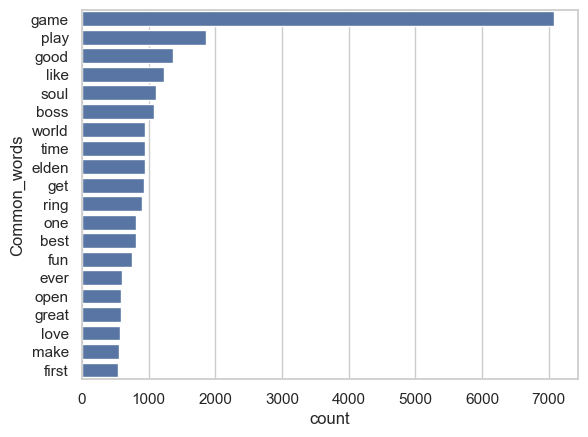

In [102]:
sns.set_theme(style="whitegrid")
sns.barplot(x="count", y="Common_words", data=temp)

## 5.1. Creating pipeline for tokenizing and modelling

In [103]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
clf = Pipeline([
    ('vect', CountVectorizer(stop_words= "english")),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier()),
    ])

In [104]:
X = review['review']
y = review['voted_up']

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 40,
                                                   test_size = 0.20)


In [106]:
text_classifier = clf.fit(X_train,y_train)

In [107]:
predictions = text_classifier.predict(X_test)

## Model Performance

In [108]:
# find accuracy, precision, recall:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import f1_score, accuracy_score
confusion_matrix(y_test,predictions)

array([[   5,   97],
       [   7, 1458]], dtype=int64)

In [109]:
def Confusion_Matrix(y_test,ypred):
    cfmat = confusion_matrix(y_test,ypred)
    print('Confusion Matrix: \n',classification_report(y_test,ypred,labels=[1,0]))
    print("\n")
    print('TN - True Negative {}'.format(cfmat[1,1]))
    print('FP - False Positive {}'.format(cfmat[1,0]))
    print('FN - False Negative {}'.format(cfmat[0,1]))
    print('TP - True Positive {}'.format(cfmat[0,0]))
    print('Accuracy Rate: {}'.format(np.divide(np.sum([cfmat[0,0],cfmat[1,1]]),np.sum(cfmat))))
    print('Misclassification Rate: {}'.format(np.divide(np.sum([cfmat[0,1],cfmat[1,0]]),np.sum(cfmat))))
    print('F1-Score: {}'.format(f1_score(y_test, ypred,average='macro')))


In [110]:
import numpy as np

In [111]:
Confusion_Matrix(y_test,predictions)

Confusion Matrix: 
               precision    recall  f1-score   support

           1       0.94      1.00      0.97      1465
           0       0.42      0.05      0.09       102

    accuracy                           0.93      1567
   macro avg       0.68      0.52      0.53      1567
weighted avg       0.90      0.93      0.91      1567



TN - True Negative 1458
FP - False Positive 7
FN - False Negative 97
TP - True Positive 5
Accuracy Rate: 0.9336311423101468
Misclassification Rate: 0.06636885768985322
F1-Score: 0.5266411060764494


<Axes: >

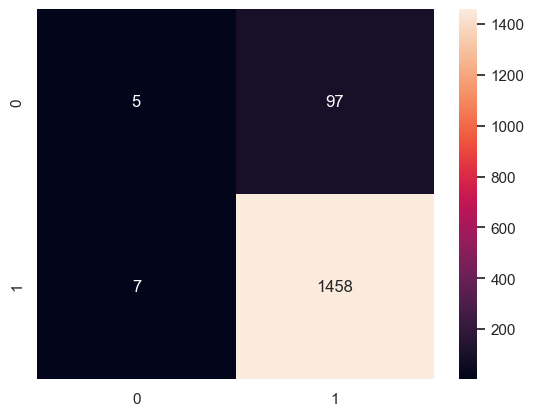

In [112]:
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt='')

### we see from above confusion matrix that our model has accuracy of 93.29% and F1-Score of 0.533 . It is not good because our data is highly imbalanced. Our model has high accuracy because it computes accuracy of prediction on majority class. After putting our attention to F1-Score, we can understand that our data is poorly at predicting negative class. 


## 5.5. Imbalanced Data Classes Handling

### We will use oversampling and undersampling method to handle our imbalanced data.

In [113]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as PL

### Then we set our sampling strategy and variables needed in pipeline

In [114]:
strategy1 = {0:473}
strategy2 = {1:7362}

vect = CountVectorizer(stop_words= "english",max_features=3000)
tfidf = TfidfTransformer()
over = SMOTE(sampling_strategy=strategy1)
under = RandomUnderSampler(sampling_strategy=strategy2)
model = RandomForestClassifier()

In [115]:
X = review['review'].values
y = review['voted_up'].values

In [116]:
Counter(y)

Counter({1: 7362, 0: 473})

In [117]:
trf = vect.fit(X)
X = trf.transform(X)

In [118]:
steps = [('over', over), ('under', under)]
pipeline = PL(steps=steps)

In [119]:
X_new, y_new = pipeline.fit_resample(X, y)

In [120]:
counter_new = Counter(y_new)
print("Sentiment Class Proportion after oversampling and undersampling: \n",counter_new)

Sentiment Class Proportion after oversampling and undersampling: 
 Counter({1: 7362, 0: 473})


In [121]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_new, y_new,random_state = 40,
                                                   test_size = 0.20)

### We prepare our original data (before oversampling and undersampling) as our evaluation data.

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 40,
                                                   test_size = 0.20)

In [123]:
Counter(y)

Counter({1: 7362, 0: 473})

### Then we run our pipeline and train the model

In [124]:
pipeline2 = Pipeline([
    ('tfidf', tfidf),
    ('model', model),
    ])

In [125]:
text_classifier2 = pipeline2.fit(X_train2,y_train2)

### Evaluation on original data

In [126]:
predictions2 = text_classifier2.predict(X_test)

In [127]:
Confusion_Matrix(y_test,predictions2)

Confusion Matrix: 
               precision    recall  f1-score   support

           1       0.99      1.00      0.99      1465
           0       0.98      0.78      0.87       102

    accuracy                           0.98      1567
   macro avg       0.98      0.89      0.93      1567
weighted avg       0.98      0.98      0.98      1567



TN - True Negative 1463
FP - False Positive 2
FN - False Negative 22
TP - True Positive 80
Accuracy Rate: 0.98468410976388
Misclassification Rate: 0.015315890236119975
F1-Score: 0.9307148120854827


<Axes: >

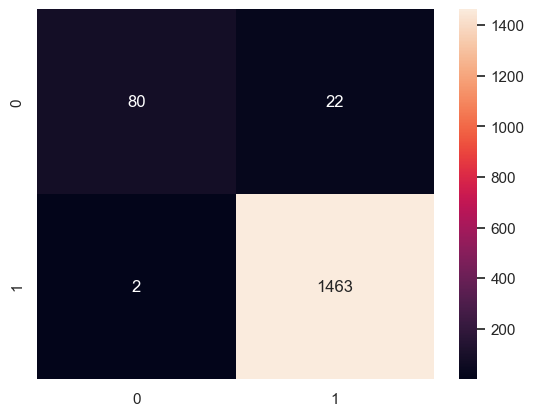

In [128]:
sns.heatmap(confusion_matrix(y_test,predictions2),annot=True,fmt='')

### Now we got better model after training it on oversampling and undersampling data. We got model with accuracy of 98.4% and F1-Score of 0.927.

In [129]:
import joblib

# Save the model to a file
joblib.dump(text_classifier2, 'sentiment_analysis_model.pkl')
joblib.dump(trf, 'count_vectorizer.pkl')
joblib.dump(tfidf, 'tfidf_transformer.pkl')


['tfidf_transformer.pkl']